## The Data

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [64]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


## Checking Type of variables

In [65]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DR_NO         185715 non-null  int64         
 1   Date Rptd     185715 non-null  datetime64[ns]
 2   DATE OCC      185715 non-null  datetime64[ns]
 3   TIME OCC      185715 non-null  object        
 4   AREA NAME     185715 non-null  object        
 5   Crm Cd Desc   185715 non-null  object        
 6   Vict Age      185715 non-null  int64         
 7   Vict Sex      185704 non-null  object        
 8   Vict Descent  185705 non-null  object        
 9   Weapon Desc   73502 non-null   object        
 10  Status Desc   185715 non-null  object        
 11  LOCATION      185715 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 17.0+ MB


# 1° Question

### Transforming 'TIME OCC' in datetime

In [66]:
crimes['TIME OCC'] = pd.to_datetime(crimes['TIME OCC'], format = '%H%M').dt.time
crimes['HOUR'] = crimes['TIME OCC'].apply(lambda time: time.hour)

### Transforming 'DATE OCC' in Day of Week

In [67]:
crimes['DAY OF WEEK'] = crimes['DATE OCC'].apply(lambda time: time.dayofweek)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
crimes['DAY OF WEEK'] = crimes['DAY OF WEEK'].map(dmap)

day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
crimes['DAY OF WEEK'] = pd.Categorical(crimes['DAY OF WEEK'], categories=day_order, ordered=True)
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,HOUR,DAY OF WEEK
0,220314085,2022-07-22,2020-05-12,11:10:00,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV,11,Tue
1,222013040,2022-08-06,2020-06-04,16:20:00,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST,16,Thu
2,220614831,2022-08-18,2020-08-17,12:00:00,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT,12,Mon
3,231207725,2023-02-27,2020-01-27,06:35:00,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV,6,Mon
4,220213256,2022-07-14,2020-07-14,09:00:00,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST,9,Tue


## **Peak Crime Hour**

In [68]:
peak_crime_hour = crimes['HOUR'].value_counts().idxmax()
print(peak_crime_hour)

12


## **Peak Crime Hour Plot**

<Axes: xlabel='HOUR', ylabel='count'>

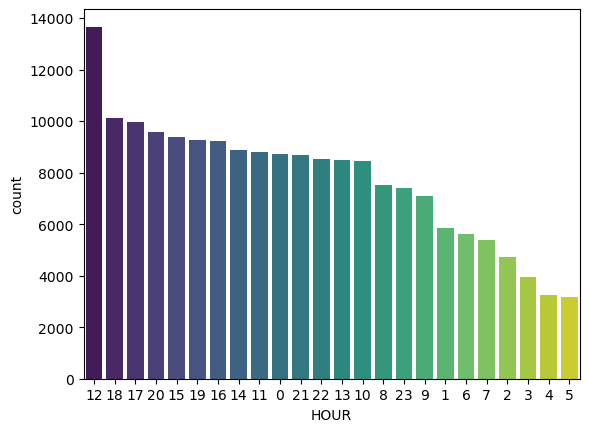

In [69]:
order_hour = crimes['HOUR'].value_counts().index

sns.countplot(data = crimes, x= 'HOUR', palette = 'viridis', order= order_hour)

## **Peak Crime Hour Heatmap**

In [70]:
dayHour = crimes.groupby(by=['DAY OF WEEK','HOUR'], observed=False).count()['Status Desc'].unstack()
dayHour.head()

HOUR,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
DAY OF WEEK,,,,,,,,,,,,,,,,,,,,,
Mon,1128,739,639,544,443,443,739,801,1082,1022,...,1236,1263,1260,1462,1429,1295,1323,1145,1196,916
Tue,1097,612,530,474,428,398,727,805,1092,1076,...,1216,1313,1298,1361,1440,1258,1287,1142,1088,917
Wed,1148,674,513,517,429,406,829,869,1149,1035,...,1302,1351,1346,1539,1488,1424,1361,1214,1080,905
Thu,1282,692,576,468,449,468,935,816,1212,1086,...,1326,1378,1282,1405,1513,1337,1372,1236,1165,1038
Fri,1260,773,626,542,437,463,895,825,1142,1070,...,1337,1534,1517,1571,1542,1470,1554,1345,1347,1283


Text(120.72222222222221, 0.5, 'Day of the Week')

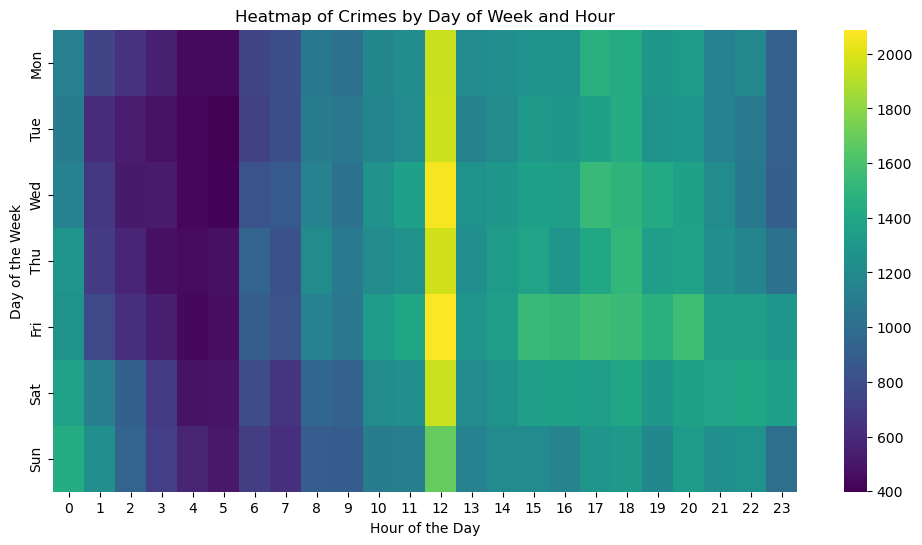

In [71]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

plt.title('Heatmap of Crimes by Day of Week and Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')

# 2° Question

### Filtering the night_crimes period

In [72]:
night_crimes = crimes[(crimes['TIME OCC'].apply(lambda x: x.hour >= 22)) | 
       (crimes['TIME OCC'].apply(lambda x: x.hour < 4))]

## **peak night crime location**

In [73]:
peak_night_crime_location = night_crimes['AREA NAME'].value_counts().idxmax()
print(peak_night_crime_location)

Central


## **Peak Night Crime Location Plot**

In [90]:
order_area = night_crimes['AREA NAME'].value_counts().index

<Axes: xlabel='AREA NAME', ylabel='count'>

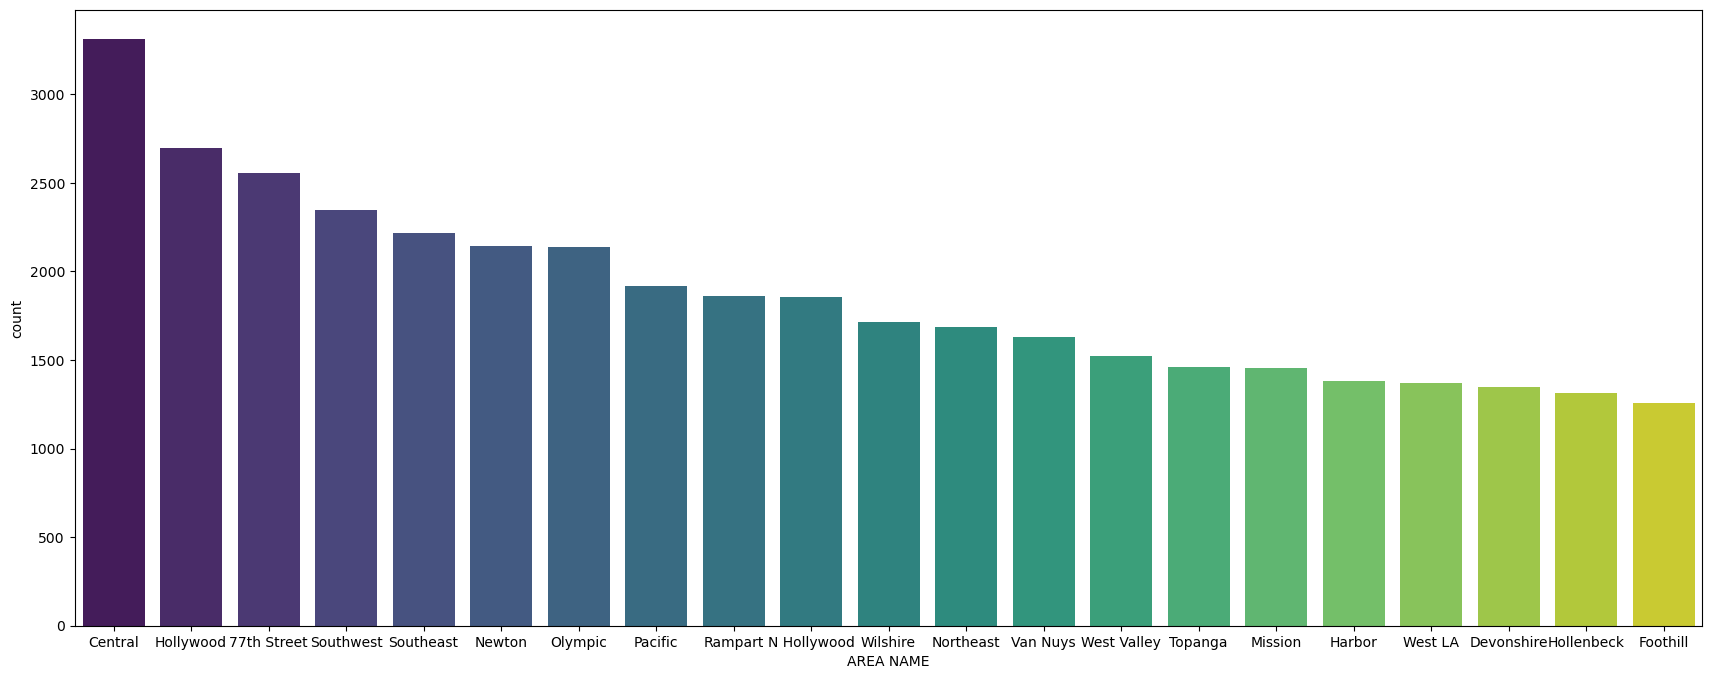

In [91]:
plt.figure(figsize=(21,8))
sns.countplot(data = night_crimes, x = 'AREA NAME',order=order_area, palette='viridis')

# 3° Question

### Filtering Age Groups

In [76]:
def age_group_func(age):
    if 0 < age < 18:
        return "0-17"
    elif 18 <= age < 26:
        return "18-25"
    elif 26 <= age < 35:
        return "26-34"
    elif 35 <= age < 45:
        return "35-44"
    elif 45 <= age < 55:
        return "45-54"
    elif 55 <= age < 65:
        return "55-64"
    else:
        return "65+"

In [77]:
crimes['Age Group'] = crimes['Vict Age'].apply(age_group_func)

## **Victim Ages**

In [78]:
victim_ages = crimes['Age Group'].value_counts().sort_values(ascending = False)
print(victim_ages, type(victim_ages))

Age Group
26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: count, dtype: int64 <class 'pandas.core.series.Series'>


## **Victim Ages Plot**

<Axes: xlabel='Age Group', ylabel='count'>

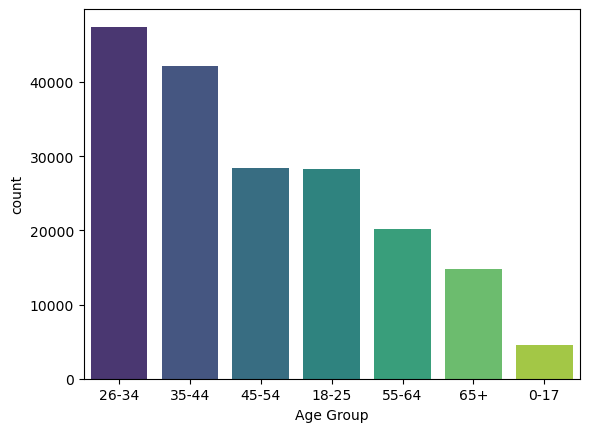

In [79]:
order_age_group = crimes['Age Group'].value_counts().index

sns.countplot(data = crimes, x = 'Age Group', palette = 'viridis',
             order = order_age_group)